# Diabetes Prediction using Advanced Techniques
we have implement Random Forest and XGBoost models with:
- PCA for dimensionality reduction
- SMOTE for handling class imbalance
- GridSearchCV and RandomizedSearchCV for hyperparameter tuning

## 1. Installing Dependencies

In [35]:
!pip install pandas scikit-learn xgboost imbalanced-learn seaborn --quiet


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## 2. Data Loading & Exploration

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
print("Loading dataset...")
df = pd.read_csv('dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

# rows and columns
print("\n=== Dataset Overview ===")
print(f"Shape: {df.shape}")

print("\nFirst 5 rows:")
display(df.head())

# Check for missing values
print("\n=== Missing Values Check ===")
print(df.isnull().sum())

Loading dataset...

=== Dataset Overview ===
Shape: (70692, 22)

First 5 rows:


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0



=== Missing Values Check ===
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


## 3. Data Preprocessing

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.iloc[:, 1:]  # All columns except Diabetes_binary
y = df.iloc[:, 0]   # Diabetes_binary column

# Standardize features
print("\nStandardizing features...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80-20)
print("\nSplitting data into train/test sets...")
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, 
    y, 
    test_size=0.2, 
    random_state=42,  
    stratify=df.iloc[:, 0].values      
)

print(f"\nTraining samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")


Standardizing features...

Splitting data into train/test sets...

Training samples: 56553
Test samples: 14139


## 4. Applying SMOTE to Handle Class Imbalance

In [38]:
from imblearn.over_sampling import SMOTE

print("\nApplying SMOTE to handle class imbalance...")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(f"New class distribution: {np.bincount(y_train_smote)}")


Applying SMOTE to handle class imbalance...
New class distribution: [28277 28277]


C:\Users\rachi\AppData\Local\Temp\ipykernel_50392\2010622516.py:6: DeprecationWarning: Non-integer input passed to bincount. In a future version of NumPy, this will be an error. (Deprecated NumPy 2.1)
  print(f"New class distribution: {np.bincount(y_train_smote)}")


## 5. Dimensionality Reduction using PCA

In [39]:
from sklearn.decomposition import PCA

print("\nApplying PCA for dimensionality reduction...")
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_smote)
X_test_pca = pca.transform(X_test)

print(f"Explained variance ratio: {pca.explained_variance_ratio_}")


Applying PCA for dimensionality reduction...
Explained variance ratio: [0.17323665 0.08261843 0.06376431 0.05731865 0.05620545 0.05157791
 0.04867278 0.04459671 0.04425253 0.04141216]


## 6. Hyperparameter Tuning with GridSearchCV

### 6.1 Random Forest GridSearchCV

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [50],           
    'max_depth': [5],              
    'min_samples_split': [5],      
    'class_weight': ['balanced']
}

grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train_pca, y_train_smote)

print("Best Random Forest Parameters (GridSearchCV):", grid_rf.best_params_)

Best Random Forest Parameters (GridSearchCV): {'class_weight': 'balanced', 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 50}


### 6.2 XGBoost GridSearchCV

In [41]:
import xgboost as xgb
import numpy as np
from sklearn.model_selection import GridSearchCV

# Ensure the data is NumPy arrays
X_train_pca_np = np.array(X_train_pca)
y_train_smote_np = np.array(y_train_smote)

xgb_clf = xgb.XGBClassifier(
    eval_metric='logloss',
    random_state=42,
    tree_method='hist', 
)

param_grid_xgb = {
    'n_estimators': [50],          
    'max_depth': [3],              
    'learning_rate': [0.3] 
}

grid_xgb = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    error_score='raise'  
)

grid_xgb.fit(X_train_pca_np, y_train_smote_np)

print("Best XGBoost Parameters (GridSearchCV):", grid_xgb.best_params_)

Best XGBoost Parameters (GridSearchCV): {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 50}


## 7. Hyperparameter Tuning with RandomizedSearchCV

### 7.1 Random Forest RandomizedSearchCV

In [42]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

rf_random = RandomForestClassifier(random_state=42)

param_dist_rf = {
    'n_estimators': randint(100, 200),    
    'max_depth': randint(8, 15),          
    'min_samples_split': randint(2, 3)    
}

random_rf = RandomizedSearchCV(rf_random, param_distributions=param_dist_rf, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
random_rf.fit(X_train_pca, y_train_smote)

print("Best Random Forest Parameters (RandomizedSearchCV):", random_rf.best_params_)

Best Random Forest Parameters (RandomizedSearchCV): {'max_depth': 12, 'min_samples_split': 2, 'n_estimators': 114}


### 7.2 XGBoost RandomizedSearchCV

In [43]:
from scipy.stats import randint, uniform
import xgboost as xgb
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# Fix data types
X_train_pca_np = np.array(X_train_pca, dtype=np.float32)
y_train_smote_np = np.array(y_train_smote)

# Clean model setup
xgb_random = xgb.XGBClassifier(
    eval_metric='logloss',
    random_state=42,
    tree_method='hist'
)

# Parameter distributions
param_dist_xgb = {
    'n_estimators': randint(100, 200),    
    'max_depth': randint(5, 8),           
    'learning_rate': uniform(0.01, 0.1)   
}

# RandomizedSearchCV with error handling
random_xgb = RandomizedSearchCV(
    estimator=xgb_random,
    param_distributions=param_dist_xgb,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
    error_score='raise'
)

# Fit the model
random_xgb.fit(X_train_pca_np, y_train_smote_np)

# Print best params
print("Best XGBoost Parameters (RandomizedSearchCV):", random_xgb.best_params_)

Best XGBoost Parameters (RandomizedSearchCV): {'learning_rate': np.float64(0.0831993941811405), 'max_depth': 5, 'n_estimators': 120}


## 8. Final Model Training with Best Parameters

### 8.1 Random Forest with Best Parameters from GridSearchCV

In [48]:
# Get best params from grid_rf
best_params_rf_grid = grid_rf.best_params_

# Create and train final Random Forest model with GridSearchCV best params
final_rf_grid = RandomForestClassifier(
    n_estimators=best_params_rf_grid['n_estimators'],
    max_depth=best_params_rf_grid['max_depth'],
    min_samples_split=best_params_rf_grid['min_samples_split'],
    class_weight=best_params_rf_grid['class_weight'],
    random_state=42
)

final_rf_grid.fit(X_train_pca, y_train_smote)
y_pred_rf_grid = final_rf_grid.predict(X_test_pca)

### 8.2 XGBoost with Best Parameters from GridSearchCV

In [49]:
# Get best params from grid_xgb
best_params_xgb_grid = grid_xgb.best_params_

# Create and train final XGBoost model with GridSearchCV best params
final_xgb_grid = xgb.XGBClassifier(
    n_estimators=best_params_xgb_grid['n_estimators'],
    max_depth=best_params_xgb_grid['max_depth'],
    learning_rate=best_params_xgb_grid['learning_rate'],
    eval_metric='logloss',
    random_state=42,
    tree_method='hist'
)

final_xgb_grid.fit(X_train_pca, y_train_smote)
y_pred_xgb_grid = final_xgb_grid.predict(X_test_pca)

### 8.3 Random Forest with Best Parameters from RandomizedSearchCV

In [50]:
# Get best params from random_rf
best_params_rf_rand = random_rf.best_params_

# Create and train final Random Forest model with RandomizedSearchCV best params
final_rf_rand = RandomForestClassifier(
    n_estimators=best_params_rf_rand['n_estimators'],
    max_depth=best_params_rf_rand['max_depth'],
    min_samples_split=best_params_rf_rand['min_samples_split'],
    random_state=42
)

final_rf_rand.fit(X_train_pca, y_train_smote)
y_pred_rf_rand = final_rf_rand.predict(X_test_pca)

### 8.4 XGBoost with Best Parameters from RandomizedSearchCV

In [51]:
# Get best params from random_xgb
best_params_xgb_rand = random_xgb.best_params_

# Create and train final XGBoost model with RandomizedSearchCV best params
final_xgb_rand = xgb.XGBClassifier(
    n_estimators=best_params_xgb_rand['n_estimators'],
    max_depth=best_params_xgb_rand['max_depth'],
    learning_rate=best_params_xgb_rand['learning_rate'],
    eval_metric='logloss',
    random_state=42,
    tree_method='hist'
)

final_xgb_rand.fit(X_train_pca, y_train_smote)
y_pred_xgb_rand = final_xgb_rand.predict(X_test_pca)

## 9. Model Evaluation

### 9.1 Classification Reports

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

print("🔍 Random Forest (GridSearchCV):")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_grid))
print(classification_report(y_test, y_pred_rf_grid))

print("🔍 XGBoost (GridSearchCV):")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_grid))
print(classification_report(y_test, y_pred_xgb_grid))

print("🔍 Random Forest (RandomizedSearchCV):")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_rand))
print(classification_report(y_test, y_pred_rf_rand))

print("🔍 XGBoost (RandomizedSearchCV):")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_rand))
print(classification_report(y_test, y_pred_xgb_rand))

🔍 Random Forest (GridSearchCV):
Accuracy: 0.7335030765966476
              precision    recall  f1-score   support

         0.0       0.78      0.66      0.71      7070
         1.0       0.70      0.81      0.75      7069

    accuracy                           0.73     14139
   macro avg       0.74      0.73      0.73     14139
weighted avg       0.74      0.73      0.73     14139

🔍 XGBoost (GridSearchCV):
Accuracy: 0.7472947167409294
              precision    recall  f1-score   support

         0.0       0.77      0.70      0.73      7070
         1.0       0.73      0.80      0.76      7069

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139

🔍 Random Forest (RandomizedSearchCV):
Accuracy: 0.7463045477049296
              precision    recall  f1-score   support

         0.0       0.78      0.69      0.73      7070
         1.0       0.72      0.80      0.76      7069


### 9.2 Confusion Matrices

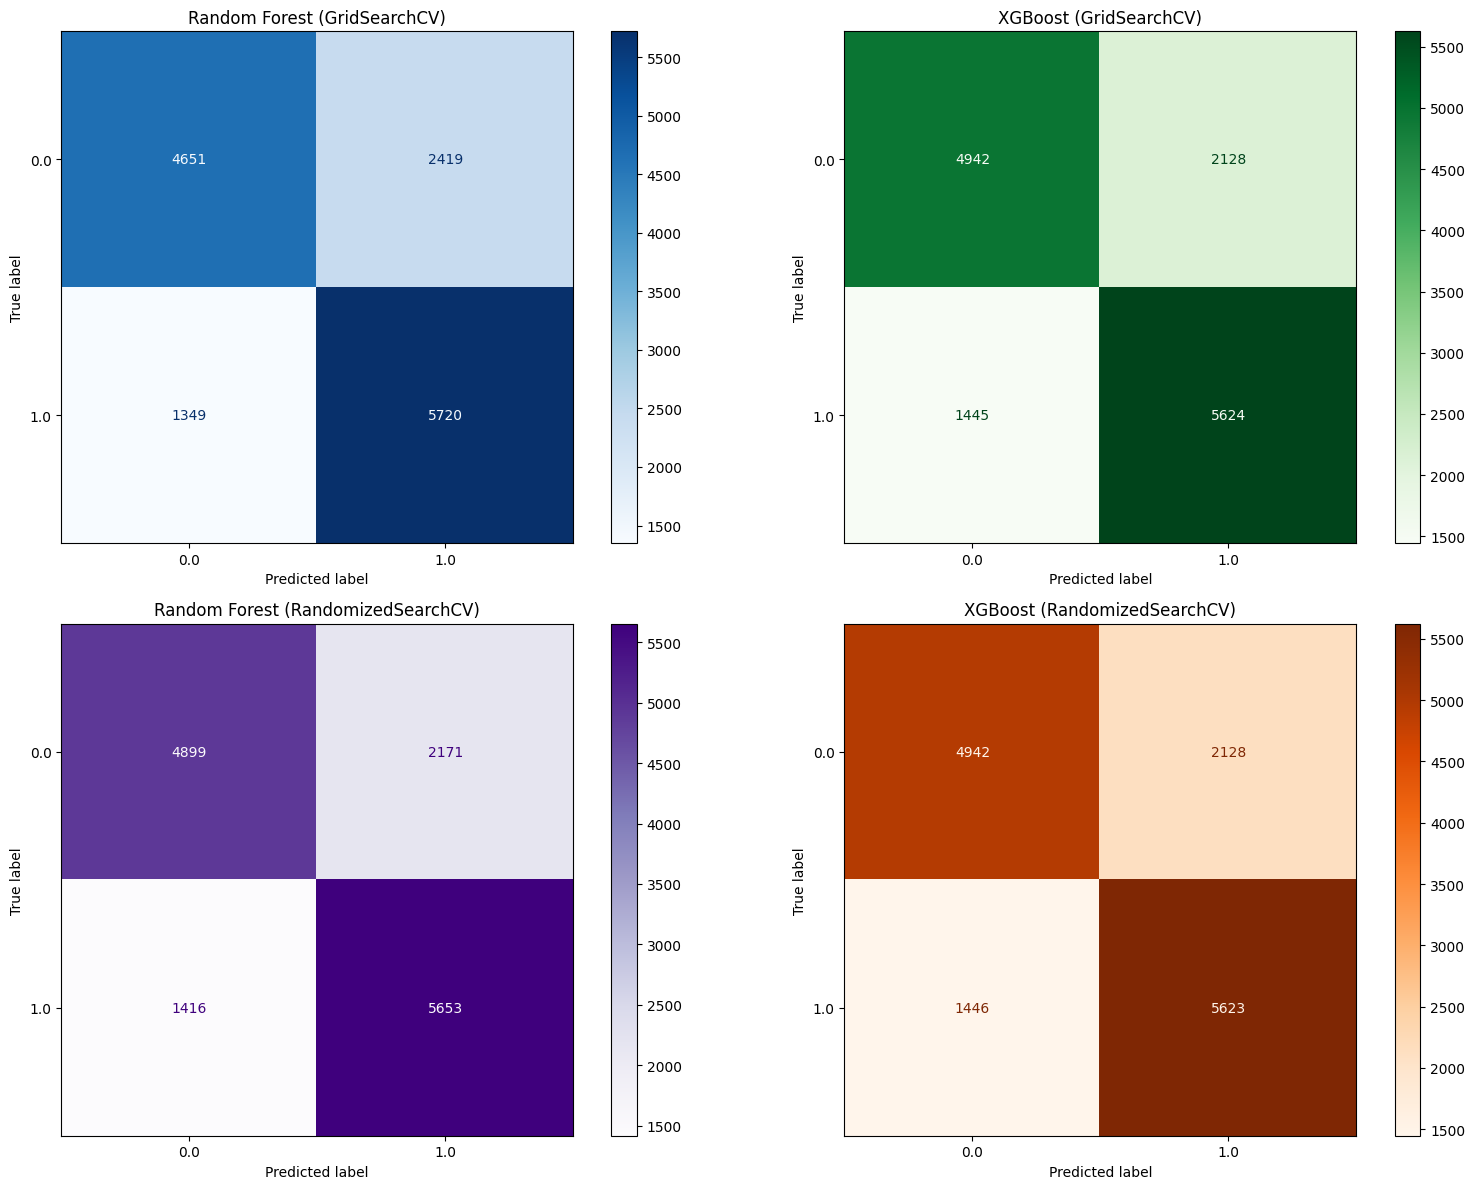

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create a 2x2 grid for all 4 models
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Plot confusion matrices
ConfusionMatrixDisplay.from_estimator(final_rf_grid, X_test_pca, y_test, ax=axs[0, 0], cmap="Blues")
axs[0, 0].set_title("Random Forest (GridSearchCV)")

ConfusionMatrixDisplay.from_estimator(final_xgb_grid, X_test_pca, y_test, ax=axs[0, 1], cmap="Greens")
axs[0, 1].set_title("XGBoost (GridSearchCV)")

ConfusionMatrixDisplay.from_estimator(final_rf_rand, X_test_pca, y_test, ax=axs[1, 0], cmap="Purples")
axs[1, 0].set_title("Random Forest (RandomizedSearchCV)")

ConfusionMatrixDisplay.from_estimator(final_xgb_rand, X_test_pca, y_test, ax=axs[1, 1], cmap="Oranges")
axs[1, 1].set_title("XGBoost (RandomizedSearchCV)")

plt.tight_layout()
plt.show()

### 9.3 ROC Curves and AUC Scores

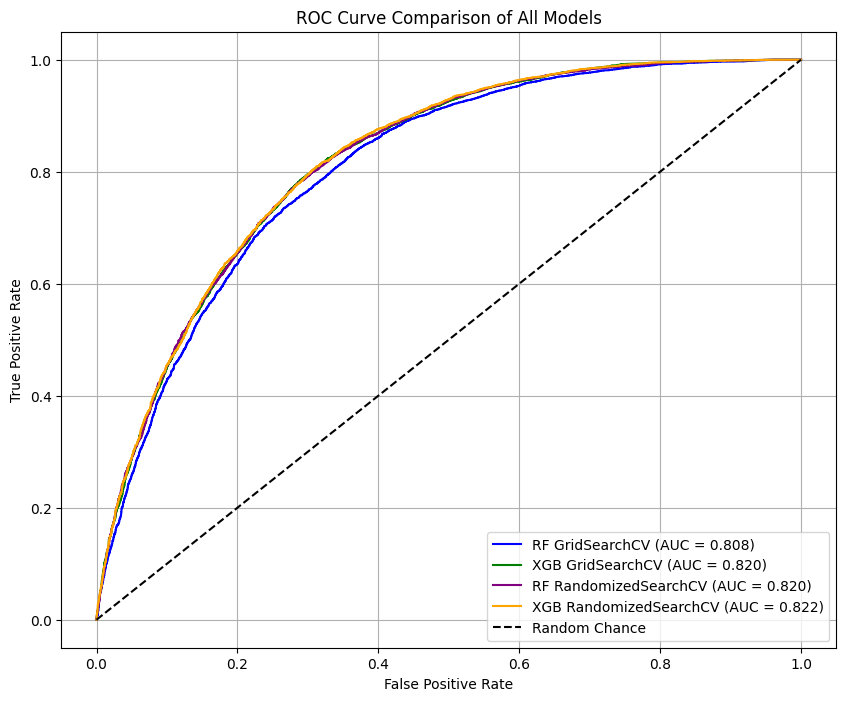

In [54]:
from sklearn.metrics import roc_curve, auc

# Calculate prediction probabilities
rf_grid_probs = final_rf_grid.predict_proba(X_test_pca)[:, 1]
xgb_grid_probs = final_xgb_grid.predict_proba(X_test_pca)[:, 1]
rf_rand_probs = final_rf_rand.predict_proba(X_test_pca)[:, 1]
xgb_rand_probs = final_xgb_rand.predict_proba(X_test_pca)[:, 1]

# Calculate ROC curves
fpr_rf_grid, tpr_rf_grid, _ = roc_curve(y_test, rf_grid_probs)
fpr_xgb_grid, tpr_xgb_grid, _ = roc_curve(y_test, xgb_grid_probs)
fpr_rf_rand, tpr_rf_rand, _ = roc_curve(y_test, rf_rand_probs)
fpr_xgb_rand, tpr_xgb_rand, _ = roc_curve(y_test, xgb_rand_probs)

# Calculate AUC scores
auc_rf_grid = auc(fpr_rf_grid, tpr_rf_grid)
auc_xgb_grid = auc(fpr_xgb_grid, tpr_xgb_grid)
auc_rf_rand = auc(fpr_rf_rand, tpr_rf_rand)
auc_xgb_rand = auc(fpr_xgb_rand, tpr_xgb_rand)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_rf_grid, tpr_rf_grid, label=f"RF GridSearchCV (AUC = {auc_rf_grid:.3f})", color="blue")
plt.plot(fpr_xgb_grid, tpr_xgb_grid, label=f"XGB GridSearchCV (AUC = {auc_xgb_grid:.3f})", color="green")
plt.plot(fpr_rf_rand, tpr_rf_rand, label=f"RF RandomizedSearchCV (AUC = {auc_rf_rand:.3f})", color="purple")
plt.plot(fpr_xgb_rand, tpr_xgb_rand, label=f"XGB RandomizedSearchCV (AUC = {auc_xgb_rand:.3f})", color="orange")
plt.plot([0, 1], [0, 1], "k--", label="Random Chance")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison of All Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### 9.4 Feature Importance Analysis

#### Best Random Forest Model Feature Importance

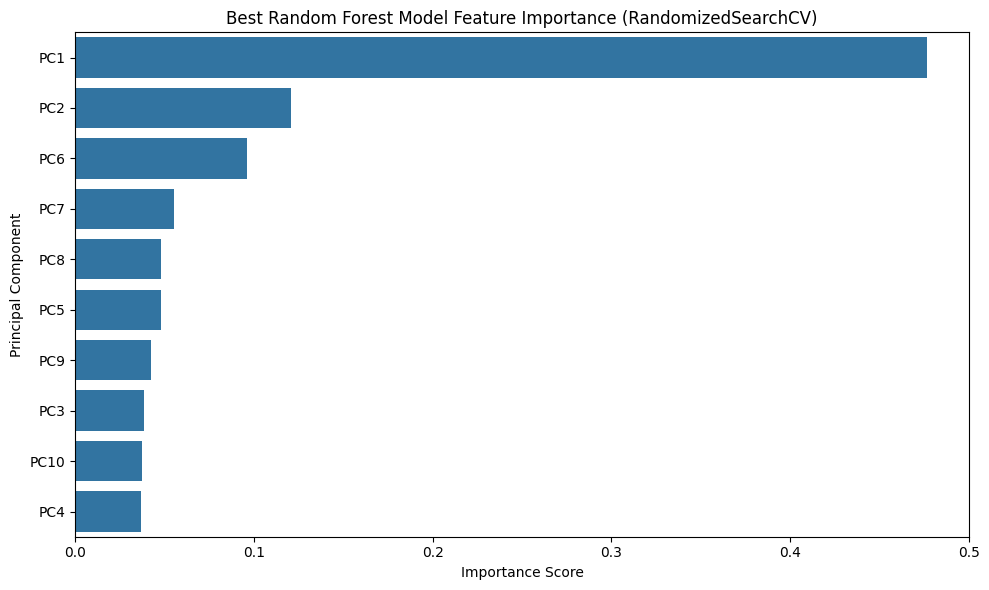

In [55]:
# Determine the best Random Forest model based on accuracy
rf_grid_acc = accuracy_score(y_test, y_pred_rf_grid)
rf_rand_acc = accuracy_score(y_test, y_pred_rf_rand)

best_rf_model = final_rf_grid if rf_grid_acc >= rf_rand_acc else final_rf_rand
best_rf_source = "GridSearchCV" if rf_grid_acc >= rf_rand_acc else "RandomizedSearchCV"

# Plot feature importance for the best Random Forest model
importances_rf = best_rf_model.feature_importances_
indices_rf = importances_rf.argsort()[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances_rf[indices_rf], y=[f"PC{i+1}" for i in indices_rf])
plt.title(f"Best Random Forest Model Feature Importance ({best_rf_source})")
plt.xlabel("Importance Score")
plt.ylabel("Principal Component")
plt.tight_layout()
plt.show()

#### Best XGBoost Model Feature Importance

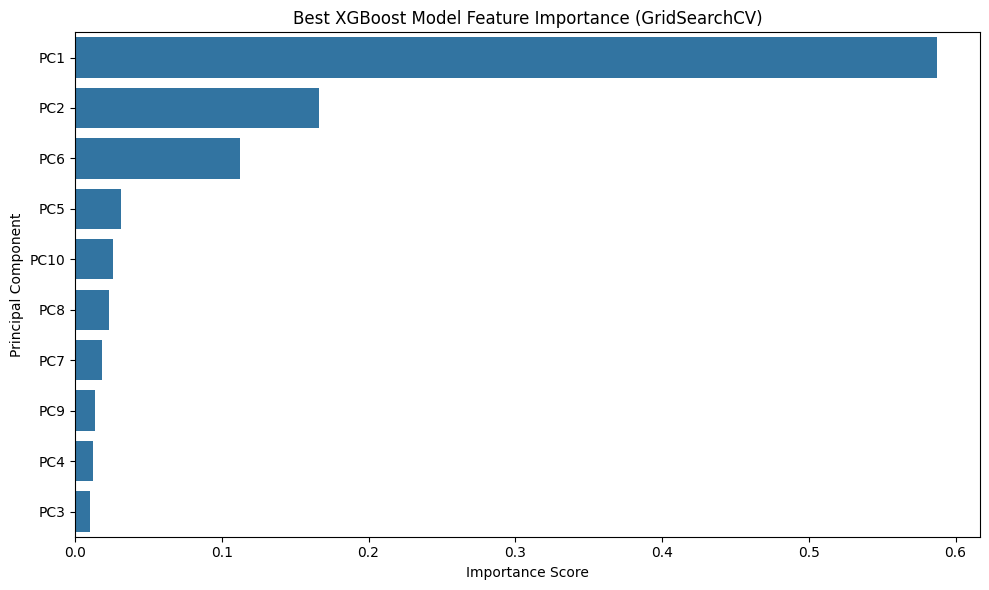

In [56]:
# Determine the best XGBoost model based on accuracy
xgb_grid_acc = accuracy_score(y_test, y_pred_xgb_grid)
xgb_rand_acc = accuracy_score(y_test, y_pred_xgb_rand)

best_xgb_model = final_xgb_grid if xgb_grid_acc >= xgb_rand_acc else final_xgb_rand
best_xgb_source = "GridSearchCV" if xgb_grid_acc >= xgb_rand_acc else "RandomizedSearchCV"

# Plot feature importance for the best XGBoost model
importances_xgb = best_xgb_model.feature_importances_
indices_xgb = importances_xgb.argsort()[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances_xgb[indices_xgb], y=[f"PC{i+1}" for i in indices_xgb])
plt.title(f"Best XGBoost Model Feature Importance ({best_xgb_source})")
plt.xlabel("Importance Score")
plt.ylabel("Principal Component")
plt.tight_layout()
plt.show()

## 10. Saving the Best Models

In [57]:
import joblib
import os

# Create directory to save models
os.makedirs('saved_models', exist_ok=True)

# Save the best Random Forest model
joblib.dump(best_rf_model, f'saved_models/random_forest_{best_rf_source}.pkl')

# Save the best XGBoost model
joblib.dump(best_xgb_model, f'saved_models/xgboost_{best_xgb_source}.pkl')

print(f"Best Random Forest model (from {best_rf_source}) saved successfully.")
print(f"Best XGBoost model (from {best_xgb_source}) saved successfully.")

Best Random Forest model (from RandomizedSearchCV) saved successfully.
Best XGBoost model (from GridSearchCV) saved successfully.


## 11. Final Comparison of Best Models

In [59]:
# Create a summary DataFrame
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

best_models = {
    f"Random Forest ({best_rf_source})": {
        "Accuracy": accuracy_score(y_test, best_rf_model.predict(X_test_pca)),
        "Precision": precision_score(y_test, best_rf_model.predict(X_test_pca)),
        "Recall": recall_score(y_test, best_rf_model.predict(X_test_pca)),
        "F1 Score": f1_score(y_test, best_rf_model.predict(X_test_pca)),
        "AUC": auc_rf_grid if best_rf_source == "GridSearchCV" else auc_rf_rand
    },
    f"XGBoost ({best_xgb_source})": {
        "Accuracy": accuracy_score(y_test, best_xgb_model.predict(X_test_pca)),
        "Precision": precision_score(y_test, best_xgb_model.predict(X_test_pca)),
        "Recall": recall_score(y_test, best_xgb_model.predict(X_test_pca)),
        "F1 Score": f1_score(y_test, best_xgb_model.predict(X_test_pca)),
        "AUC": auc_xgb_grid if best_xgb_source == "GridSearchCV" else auc_xgb_rand
    }
}

# Create and display the DataFrame
summary_df = pd.DataFrame(best_models).T
summary_df = summary_df.round(4) * 100  # Convert to percentage
print("=== Final Comparison of Best Models (%) ===")
display(summary_df)

# Determine the overall best model
best_model_name = summary_df["F1 Score"].idxmax()
print(f"\nThe best overall model is: {best_model_name} with an F1 Score of {summary_df.loc[best_model_name, 'F1 Score']:.2f}%")

=== Final Comparison of Best Models (%) ===


,Accuracy,Precision,Recall,F1 Score,AUC
Random Forest (RandomizedSearchCV),74.63,72.25,79.97,75.91,82.03
XGBoost (GridSearchCV),74.73,72.55,79.56,75.89,82.00



The best overall model is: Random Forest (RandomizedSearchCV) with an F1 Score of 75.91%
